In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 

from qiskit import IBMQ,BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit ,ClassicalRegister, QuantumRegister,execute

from qiskit.tools.visualization import plot_histogram

IBMQ.save_account('ae3eea413b98f53a07979e58a6370ac79fa791d98156e501e3aa29ab16b64e4207aade400753052d2180597599117f286a726175bc899')

Credentials already present. Set overwrite=True to overwrite.


In [2]:
nQubits =4 #number of phyzical qubits used  to reprezent s
s=11 #convert to zecimal
#hideen integer valoare in intreg a nr in binar 
#verificare daca incape  in n qbit
s=s%2**(nQubits)


In [3]:
#Create circuit 
qr=QuantumRegister(nQubits)
cr=ClassicalRegister(nQubits)

bvCircuit=QuantumCircuit(qr,cr)

#forst leyer of hadamard
for i in range (nQubits):
    bvCircuit.h(qr[i])
    
bvCircuit.barrier()

for i in range(nQubits):
    if(s&(1<<i)):
        bvCircuit.z(qr[i])
    else:
        bvCircuit.iden(qr[i])
        
bvCircuit.barrier()

for i in range(nQubits):
    bvCircuit.h(qr[i])
    
bvCircuit.barrier()

bvCircuit.measure(qr,cr)

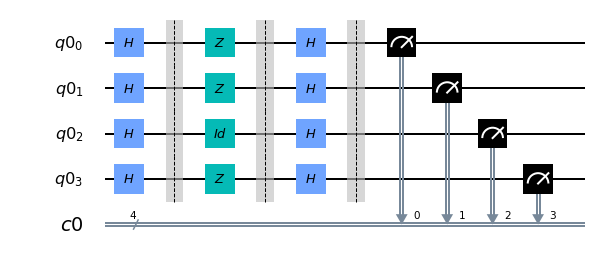

In [7]:
bvCircuit.draw(output='mpl')

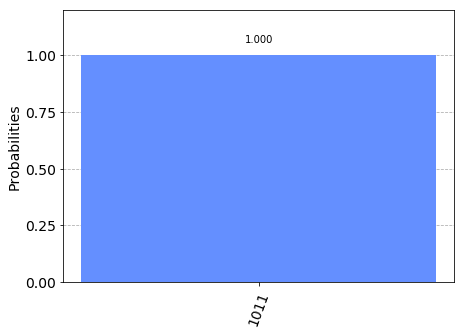

In [8]:
# use local simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(bvCircuit, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

In [9]:
IBMQ.load_account()
provider=IBMQ.get_provider(hub='ibm-q')
provider.backends()
backend=least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >=5 and not x.configuration().simulator and x.status().operational==True))

Credentials are already in use. The existing account in the session will be replaced.


In [10]:
print("least busy backendn m",backend)

least busy backendn m ibmqx2


In [11]:
#Run on the least busy backend
from qiskit.tools.monitor import job_monitor

shots =1024
job = execute(bvCircuit,backend=backend,shots=shots)

job_monitor(job,interval =2)

Job Status: job has successfully run


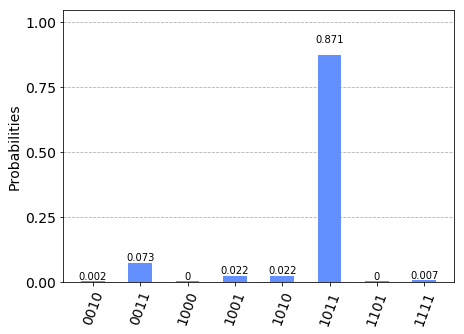

In [12]:
#Get rezult from computation
result =job.result()
answer=result.get_counts()

plot_histogram(answer)